In [424]:
# імпорт бібліотек

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
from scipy.stats.stats import pearsonr

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras.regularizers import l2
#from tensorflow.keras.models import save_model
#from tensorflow.keras import regularizers

from statsmodels.tsa.stattools import adfuller
#from scipy.stats import shapiro

import matplotlib.pyplot as plt

#from tensorflow.keras.models import load_model


In [2]:
# завантаження даних
df = pd.read_csv(r'C:\Users\adima\Desktop\thesis\data_overview\data\ready_data.csv', index_col = 'Date')
df.head()

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,80.120003,81.510002,109.800003,17.440001,7.643214,15.690000,34.000000,50.771484,69.875954,20.382376,...,50.000000,18.13,196.329058,206.848904,227.129638,252.493514,248.891640,0.0,neutral,173.080002
2010-01-05,80.589996,81.769997,109.699997,17.781000,7.656429,16.200001,35.299999,51.191406,71.211830,20.382376,...,100.000000,14.43,196.241785,206.683378,226.724462,251.131430,240.649170,0.0,neutral,176.139999
2010-01-06,81.889999,83.180000,111.510002,18.163000,7.534643,16.389999,36.400002,50.478516,69.980919,20.382376,...,61.305811,12.58,196.154250,206.517375,226.316058,249.756022,232.466705,0.0,neutral,174.259995
2010-01-07,81.510002,82.660004,110.820000,18.333000,7.520714,16.930000,36.500000,52.519531,70.772903,20.382376,...,73.562538,19.61,196.066451,206.350900,225.904467,248.367889,224.401234,0.0,neutral,177.669998
2010-01-08,81.370003,82.750000,111.370003,18.458000,7.570714,16.780001,35.900002,53.291016,73.330154,20.382376,...,58.315108,17.76,195.978388,206.183958,225.489733,246.967633,216.508114,0.0,neutral,174.309998


In [3]:
df.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'MA7',
       'MA21', 'EMA', 'PCh_up', 'PCh_dn', 'PCc_mid', '20STD', 'upper_band',
       'lower_band', 'LeadingSpanA', 'LeadingSpanB', 'BaseLine',
       'ConversionLine', 'MassIndex', 'Stoch', 'StochSignal', 'rsi', 'EMA12',
       'EMA26', 'MACD', 'GSshift1', 'ROC7', 'momentum', 'VWAP', 'MFI',
       'google_trends', 'inv_fft3', 'inv_fft6', 'inv_fft9', 'inv_fft20',
       'inv_fft100', 'maxlogit', 'sentiment', 'GS'],
      dtype='object')

In [4]:
cols_to_drop = ['Adj Close', 'Open', 'High', 'Low', 'Adj Close']
df.drop(cols_to_drop, axis = 1, inplace=True)
df.columns

Index(['BZ=F_oil', 'CL=F_oil', 'GLD', 'SI=F', 'AAPL', 'BAC', 'C', 'CS', 'DB',
       'GSBD(march-19-2015)', 'HRI', 'JPM', 'LYG', 'MAN', 'MS', 'MUFG', 'UBS',
       'CNYUSD=X', 'EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'RUBUSD=X',
       'google_trends_GS', '10YBIR', 'DFF', 'LIBOR', '10YearBondUS', 'TNX',
       'VIX', 'CPALTT01USM657N', 'M2SL', 'MEDCPIM158SFRBCLE', 'PPIACO',
       'UNRATE', 'GDP', 'GDPC1', 'DJIA', 'FTSE', 'HSI', 'IXIC', 'N225', 'NYA',
       'RUT', 'S&P500', 'Volume', 'MA7', 'MA21', 'EMA', 'PCh_up', 'PCh_dn',
       'PCc_mid', '20STD', 'upper_band', 'lower_band', 'LeadingSpanA',
       'LeadingSpanB', 'BaseLine', 'ConversionLine', 'MassIndex', 'Stoch',
       'StochSignal', 'rsi', 'EMA12', 'EMA26', 'MACD', 'GSshift1', 'ROC7',
       'momentum', 'VWAP', 'MFI', 'google_trends', 'inv_fft3', 'inv_fft6',
       'inv_fft9', 'inv_fft20', 'inv_fft100', 'maxlogit', 'sentiment', 'GS'],
      dtype='object')

### Label Encoding

In [5]:
# кодування настроїв новин від 0 до 2
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [6]:
for ind, x in enumerate(label_encoder.classes_):
    print(ind, x)

0 negative
1 neutral
2 positive


### Train test split

In [7]:
# дати поділу вибірки
first_timestamp = '2018-01-01' # тренувальні - валідаційні
second_timestamp = '2019-09-01'  # валідаційні - тестові

In [8]:
# поділ датасету на тренувальні+валідаційні та тестові
train_val_dataset = df[df.index < '2019-09-01']
test_dataset = df[df.index >= '2019-09-01']

train_val_dataset.shape, test_dataset.shape

((3527, 79), (579, 79))

In [9]:
# довжина вчідного вектора та передбачуваного вектора
n_steps_in, n_steps_out = 60 , 30 

In [10]:
# подовження тестової вибірки
test_dataset_extended = train_val_dataset.tail(n_steps_in)
test_dataset_extended = test_dataset_extended.append(test_dataset, ignore_index = False)

train_val_dataset.shape, test_dataset_extended.shape

((3527, 79), (639, 79))

In [11]:
test_dataset_extended.head(2)

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-03,63.010002,56.669999,133.630005,15.075333,51.102501,29.049999,70.849998,12.100,7.81,19.950001,...,83.273502,18.46,217.586405,196.087925,211.761649,198.981134,204.784723,0.203925,1,206.039993
2019-07-04,63.620003,57.089999,132.885002,14.996667,51.080000,29.154999,71.125000,12.175,7.92,19.855001,...,90.223733,9.10,217.565940,196.085916,211.945700,198.735558,205.747047,0.495423,2,206.969993


### Standartization

In [12]:
# всі колонки крім категоріальної та сили емоції
cols_to_transform = np.asarray(list(filter(lambda x: x !='maxlogit' and x != 'sentiment', np.asarray(df.columns))))

In [13]:
train_val_dataset_scale = train_val_dataset.copy()
test_dataset_scale = test_dataset_extended.copy()

# стандартизація
standard_scaler = StandardScaler()


# тренуваьна та тестова вибірки окремо
train_val_dataset_scale[cols_to_transform] = standard_scaler.fit_transform(train_val_dataset_scale[cols_to_transform])
test_dataset_scale[cols_to_transform] = standard_scaler.transform(test_dataset_scale[cols_to_transform])


In [14]:
train_val_dataset_scale.head(2)

,BZ=F_oil,CL=F_oil,GLD,SI=F,AAPL,BAC,C,CS,DB,GSBD(march-19-2015),...,MFI,google_trends,inv_fft3,inv_fft6,inv_fft9,inv_fft20,inv_fft100,maxlogit,sentiment,GS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.020523,0.384453,-1.071420,-0.530172,-1.483984,-0.243614,-1.259143,2.603276,2.255428,-0.339027,...,-0.076114,1.150546,0.530097,0.768029,1.238127,1.844950,1.763665,0.0,1,-0.035474
2010-01-05,-0.002416,0.396220,-1.076959,-0.482381,-1.482938,-0.171738,-1.158777,2.644692,2.335302,-0.339027,...,2.364106,0.411800,0.527696,0.763867,1.228335,1.812497,1.567834,0.0,1,0.037172


### PCA

In [15]:
# функція побудови діаграми розсіювання
def plot_scatter(df, x, y):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], alpha=0.3, s=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()
    plt.show()

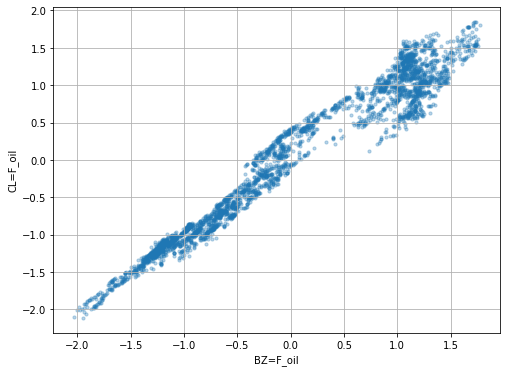

In [16]:
# діаграма розсіювання
plot_scatter(train_val_dataset_scale, 'BZ=F_oil', 'CL=F_oil')

In [17]:
# метод головних компонент
pca = PCA()
# підбор оптимальної розмірності
X_pca = pca.fit(train_val_dataset_scale[train_val_dataset_scale.columns[:-3]])

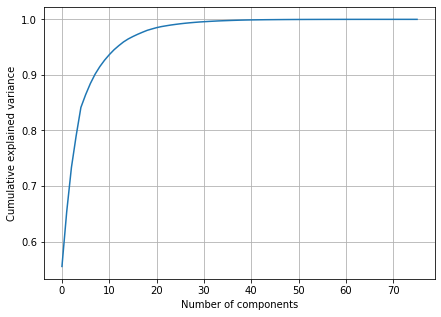

In [18]:
# графік підбору оптимальної розмірності
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [19]:
# обрана кількість ознак
num_components = 30
# метод гол. комп.
pca = PCA(num_components)
# тренуальна та тестова вибірки окремо
X_train_val_pca = pca.fit_transform(train_val_dataset_scale[train_val_dataset_scale.columns[:-3]])
X_test_pca = pca.transform(test_dataset_scale[test_dataset_scale.columns[:-3]])

In [20]:
# початкова розмірнвсть
X_train_val_pca.shape, X_test_pca.shape

((3527, 30), (639, 30))

In [21]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
np.array(most_important_names)

array(['MS', 'UBS', 'rsi', 'PPIACO', 'CNYUSD=X', 'GSBD(march-19-2015)',
       'google_trends_GS', 'MassIndex', 'CPALTT01USM657N', '20STD',
       'MassIndex', 'Volume', 'Volume', 'GSBD(march-19-2015)',
       'MEDCPIM158SFRBCLE', 'VIX', 'Stoch', '10YBIR', 'HSI', 'MUFG',
       'MEDCPIM158SFRBCLE', 'CNYUSD=X', '10YBIR', '10YBIR', 'rsi',
       'google_trends_GS', 'CNYUSD=X', 'MAN', 'CNYUSD=X', 'UBS'],
      dtype='<U19')

In [22]:
# отримана розмірніть
pca_train_val_df, pca_test_df = pd.DataFrame(X_train_val_pca), pd.DataFrame(X_test_pca)

pca_train_val_df.set_index(train_val_dataset_scale.index, inplace=True)
pca_test_df.set_index(test_dataset_scale.index, inplace=True)

# з'єднання датасетів
pca_train_val_df = pd.merge(pca_train_val_df, train_val_dataset_scale[train_val_dataset_scale.columns[-3:]], \
                           how= 'right', left_index=True, right_index=True)
pca_test_df = pd.merge(pca_test_df, test_dataset_scale[test_dataset_scale.columns[-3:]], \
                      how= 'right', left_index=True, right_index=True)

pca_train_val_df.shape, pca_test_df.shape

((3527, 33), (639, 33))

### Stationarization

In [23]:
# колонки для стаціонаризації
cols_to_stationarize = list(filter(lambda x: x !='maxlogit' and x != 'sentiment', np.asarray(pca_train_val_df.columns)))

In [24]:
stationary_train_val_df = pca_train_val_df.copy()
stationary_test_df = pca_train_val_df.tail(1).append(pca_test_df, ignore_index=False)

# навчальна та тестова вибірки окремо
stationary_train_val_df[cols_to_stationarize] = stationary_train_val_df[cols_to_stationarize].diff()
stationary_train_val_df.fillna(method='bfill', inplace=True)

stationary_test_df[cols_to_stationarize] = stationary_test_df[cols_to_stationarize].diff()
stationary_test_df = stationary_test_df[1:]

# отримана розмірність
stationary_train_val_df.shape, stationary_test_df.shape

((3527, 33), (639, 33))

In [25]:
# кількітсть пропущених значень
stationary_train_val_df.isna().sum().sum(), stationary_test_df.isna().sum().sum()

(0, 0)

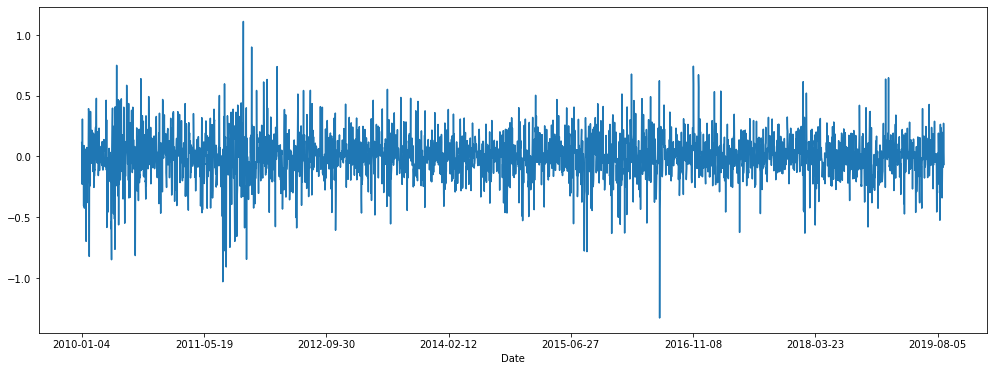

In [26]:
# візуалізація нової ознаки
stationary_train_val_df[1].plot(figsize=(17,6));

### Testing data

In [27]:
# # тест Дікі-Фуллера для кожної ознаки на стаціонарність
# def get_adfuller(df, check_stat_cols):
#     res = []
#     for col in check_stat_cols:
#         dftest = adfuller(df[col])
#         pval = dftest[1]
#         if pval <= 0.05: # не приймаємо Н0 про нестаціонарність -- ряд стаціонарний
#             res.append('stationary')
#         else:           # приймаємо Н0 -- ряд нестаціонарний
#             res.append('non-stationary')
#     adfuller_result_df = pd.DataFrame({'Columns': check_stat_cols, 'Result': res})
    
#     return adfuller_result_df

In [28]:
# # результат тестування по кожній ознаці
# adfuller_result_df = get_adfuller(stationary_train_val_df, cols_to_stationarize)
# adfuller_result_df

In [29]:
# # кількість стаціонарних/нестаціонарних
# adfuller_result_df.groupby(['Result']).count()

###  Create data for NN

In [30]:
first_timestamp, second_timestamp

('2018-01-01', '2019-09-01')

In [31]:
# поділ на:
train_dataset  = stationary_train_val_df[stationary_train_val_df.index < '2018-01-01'] # тренувальні
val_dataset = stationary_train_val_df[(stationary_train_val_df.index >= '2018-01-01')] # валідаційні
test_dataset_extended = stationary_test_df # тестові

# розмірність
train_dataset.shape, val_dataset.shape, test_dataset_extended.shape

((2919, 33), (608, 33), (639, 33))

In [32]:
# довжина (кількість) пояснюючих і пояснбваних змінних
n_steps_in, n_steps_out

(60, 30)

In [33]:
# розширення валідаційного датасету
val_dataset_extended = train_dataset.tail(n_steps_in)
val_dataset_extended = val_dataset_extended.append(val_dataset, ignore_index = False)

In [34]:
# розмірність
train_dataset.shape, val_dataset_extended.shape, test_dataset_extended.shape

((2919, 33), (668, 33), (639, 33))

In [35]:
# перетворення на масиви numpy
train_dataset_arr = train_dataset.to_numpy()
val_dataset_ext_arr = val_dataset_extended.to_numpy()
test_dataset_ext_arr = test_dataset_extended.to_numpy()

In [36]:
train_dataset_arr.shape

(2919, 33)

In [37]:
def split_sequences_test(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    
    start_ix = 0
    middle_ix = n_steps_in
    end_ix = n_steps_in + n_steps_out -1

    for i in range(int((sequences.shape[0] - n_steps_in)/n_steps_out)):
#         print('start_ix', start_ix)
#         print('middle_ix', middle_ix)
#         print('end_ix', end_ix)
        if end_ix > len(sequences):
            break

        seq_x, seq_y = sequences[start_ix : middle_ix, :-1], sequences[middle_ix-1 : end_ix, -1]

        X.append(seq_x)
        y.append(seq_y)

        start_ix += n_steps_out
        middle_ix += n_steps_out
        end_ix += n_steps_out

#         print(i+1)

    return np.array(X), np.array(y)

def split_sequences_train(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    n=1
    for i in range(len(sequences)):
        # знаходження кінця послідовності
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        
        # перевірка, чи не вийшов алг за межі датасета
        if out_end_ix > len(sequences):
            break
        # збір вхідних та вихідних даних
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        
        X.append(seq_x)
        y.append(seq_y)
        
        n+=1

    print('Len ready arr', n)
    print('Len sequance', len(sequences))
    print('-----------')
    
    
    return np.array(X), np.array(y)

In [248]:
# приведення даних до нового виду
X_train, y_train = split_sequences_train(train_dataset_arr, n_steps_in, n_steps_out) # тренувальні
X_val, y_val = split_sequences_train(val_dataset_ext_arr, n_steps_in, n_steps_out)# валідаційні 
X_test, y_test = split_sequences_test(test_dataset_ext_arr, n_steps_in, n_steps_out)# тестові
# розмірність даних
print('X_train shape =', X_train.shape, '; Y train shape =', y_train.shape)
print('X_val shape =', X_val.shape, '; Y val shape =', y_val.shape)
print('X_test shape =', X_test.shape, '; Y test shape =', y_test.shape)
n_features = X_train.shape[2]
# довжини послідовностей
print('N input length =', n_steps_in)
print('N output length =', n_steps_out)
print('N features = ', n_features)

Len ready arr 2832
Len sequance 2919
-----------
Len ready arr 581
Len sequance 668
-----------
X_train shape = (2831, 60, 32) ; Y train shape = (2831, 30)
X_val shape = (580, 60, 32) ; Y val shape = (580, 30)
X_test shape = (19, 60, 32) ; Y test shape = (19, 30)
N input length = 60
N output length = 30
N features =  32


In [39]:
int((2919-60)/30)

95

### LSTM Building

In [558]:
#optimizer

opt = Adam(learning_rate = 0.0001)

#model

model = Sequential()

model.add(LSTM(60,  input_shape=( n_steps_in, n_features)))#перший шар return_sequences=True, 
model.add(Dropout(0.15))# дропаут від перенавчання

# model.add(LSTM(60))# другий шар
# model.add(Dropout(0.2))# дропаут від перенавчання

# model.add(LSTM(100))# другий шар
# model.add(Dropout(0.2))# дропаут від перенавчання

model.add(Dense(n_steps_out))
model.add(Activation('linear')) # для рішення проблеми регресії - ф акт лінійна

model.compile(loss='mse' , optimizer=opt , metrics=['mse']) # компіляція моделі

In [559]:
# опис
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 60)                22320     
_________________________________________________________________
dropout_50 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 30)                1830      
_________________________________________________________________
activation_42 (Activation)   (None, 30)                0         
Total params: 24,150
Trainable params: 24,150
Non-trainable params: 0
_________________________________________________________________


In [560]:
# навчання нейромережі
history = model.fit(X_train , y_train , epochs=16, batch_size=140, \
                    #steps_per_epoch=25 , \
                    verbose=1 ,\
                    validation_data=(X_val, y_val) , \
                    shuffle=False)

Epoch 1/16
21/21 [==============================] - 3s 148ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 2/16
21/21 [==============================] - 2s 85ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3/16
21/21 [==============================] - 2s 76ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 4/16
21/21 [==============================] - 2s 85ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 5/16
21/21 [==============================] - 2s 81ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 6/16
21/21 [==============================] - 2s 77ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 7/16
21/21 [==============================] - 2s 86ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 8/16
21/21 [==============================] - 2s 79ms/step - loss: 0.0065 - 

In [561]:
def plot_error(train_err, val_error):
    plt.plot(history.history[train_err])
    plt.plot(history.history[val_error])
    plt.title('model ' + train_err)
    plt.ylabel(train_err)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()

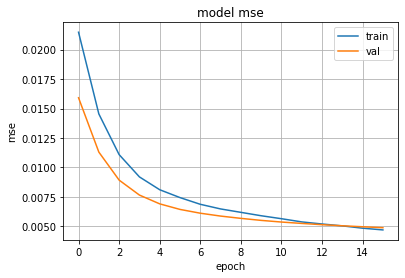

In [562]:
plot_error('mse', 'val_mse')

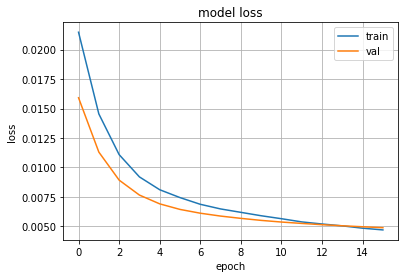

In [563]:
plot_error('loss', 'val_loss')

In [564]:
# прогнозування
y_pred = model.predict(X_test)

In [565]:
# позмірність вихідних даних
y_pred.shape

(19, 30)

In [566]:
last_train_val = pca_test_df['GS'].loc['2019-08-31']

# функція зворотної стандартизації
def invTransform(scaler, data):
    data = data.to_numpy()
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[dummy.columns[-1]] = data
    
    return scaler.inverse_transform(dummy)[:, -1]

def stack_output_test(y_pred, y_test):
    arr_pred = y_pred.flatten()
    arr_test = y_test.flatten()
    
    if len(arr_pred) == len(arr_test):
        print('Ok')
    else:
        print('Doesnt match')
        
    pred_df = pd.DataFrame(data = {'Predicted':arr_pred , 'Real': arr_test}, \
                           index = pd.to_datetime(np.arange(second_timestamp, len(arr_test), dtype = 'datetime64[D]')))
    
    # зворотня стаціонаризація
    pred_df['Predicted_non_stationary'] = np.r_[last_train_val, pred_df['Predicted']].cumsum()[1:] 
    pred_df['Real_non_stationary'] = np.r_[last_train_val, pred_df['Real']].cumsum()[1:]
    
    # зворотня стандартизація
    pred_df['Predicted_inverse'] = invTransform(standard_scaler, pred_df['Predicted_non_stationary'])
    pred_df['Real_inverse'] = invTransform(standard_scaler, pred_df['Real_non_stationary'])
    

    return pred_df

In [567]:
# результуючий датасет
pred_df = stack_output_test(y_pred, y_test)
pred_df

Ok


,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
2019-09-01,-0.043313,-0.029319,0.623807,0.637801,200.850544,201.440002
2019-09-02,0.068247,-0.029319,0.692055,0.608482,203.725281,200.205002
2019-09-03,0.022685,-0.029319,0.714739,0.579163,204.680818,198.970001
2019-09-04,0.010889,-0.029319,0.725628,0.549844,205.139487,197.735000
2019-09-05,-0.067666,0.065523,0.657962,0.615367,202.289232,200.494995
...,...,...,...,...,...,...
2021-03-19,0.075278,0.072408,1.615546,4.087862,242.625007,346.764999
2021-03-20,0.031055,-0.090213,1.646601,3.997649,243.933108,342.965011
2021-03-21,0.015929,-0.038539,1.662530,3.959110,244.604066,341.341670
2021-03-22,0.013809,-0.038539,1.676339,3.920571,245.185749,339.718328


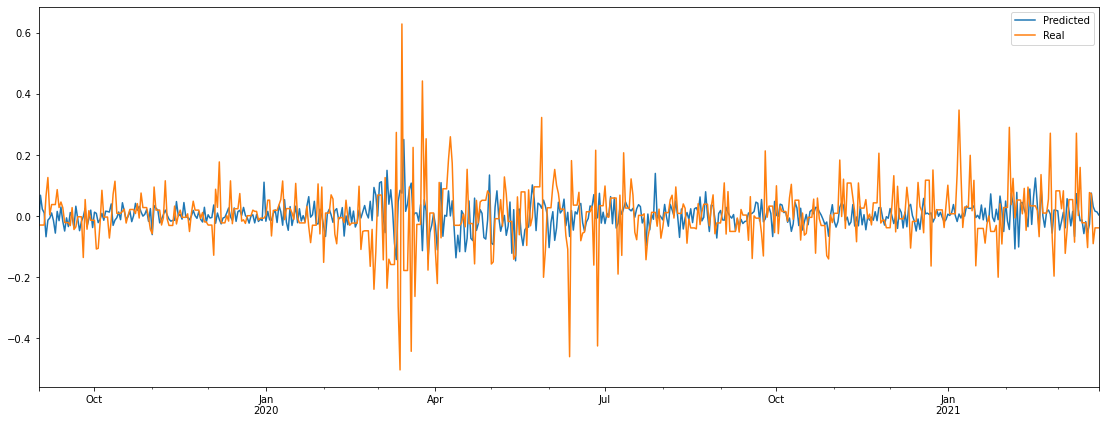

In [568]:
pred_df[['Predicted', 'Real']].plot(figsize=(19,7));

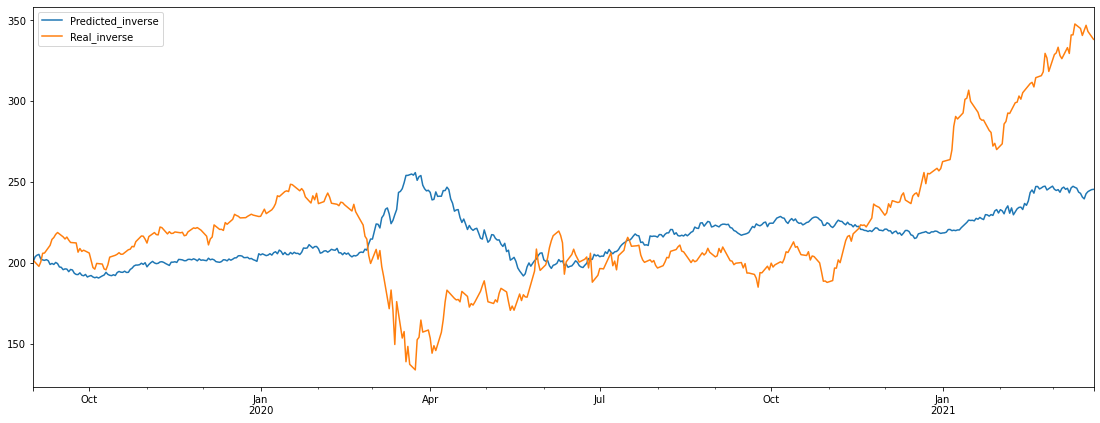

In [569]:
pred_df[['Predicted_inverse', 'Real_inverse']].plot(figsize=(19,7));

In [386]:
# метрики

def score_metr(real, pred):
    mse = mean_squared_error(real, pred) # mean_squared_error
    mae = mean_absolute_error(real, pred) # mean_absolute_error
    r2 = r2_score(real, pred) # r2_score
    cov = np.cov(real, pred)[0][1] # клваріація
    corr = pearsonr(real, pred)[0] # кореляція Пірсона
    
    return [mse, mae, r2, cov, corr]

In [387]:
res_df = pd.DataFrame()
res_df['Metrics'] = ['MSE', 'MAE', 'R2', 'Cov', 'Rearson_corr']
res_df['Stat_Stand_Score'] = score_metr(pred_df['Real'], pred_df['Predicted'])
res_df['Final_Score'] = score_metr(pred_df['Real_inverse'], pred_df['Predicted_inverse'])

res_df

,Metrics,Stat_Stand_Score,Final_Score
0,MSE,0.010590,2909.356662
1,MAE,0.069814,44.501218
2,R2,-0.179106,-0.677538
3,Cov,-0.000055,1215.419148
4,Rearson_corr,-0.014985,0.640400


In [334]:
# # зберігання моделі
# model.save('model_1layer60neur.h5')

In [335]:
# # зберігання отриманих даних
# a = pred_df.copy()
# a = a.reset_index()
# a.rename({'index':'Date'}, axis=1, inplace=True)
# a.to_csv(r'C:\Users\adima\Desktop\thesis\project\data\predictions_30days.csv', index=False)

In [515]:
model = load_model(r'model_1layer60neur.h5')

In [114]:
#optimizer

opt = Adam(learning_rate = 0.0001)

#model

model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=( n_steps_in, n_features)))#перший шар
model.add(Dropout(0.2))# дропаут від перенавчання

model.add(LSTM(100))# другий шар
model.add(Dropout(0.2))# дропаут від перенавчання

# model.add(LSTM(100))# другий шар
# model.add(Dropout(0.2))# дропаут від перенавчання

model.add(Dense(n_steps_out))
model.add(Activation('linear')) # для рішення проблеми регресії - ф акт лінійна

model.compile(loss='mse' , optimizer=opt , metrics=['mse']) # компіляція моделі

In [115]:
# опис
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 60, 100)           53200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
activation_10 (Activation)   (None, 30)                0         
Total params: 136,630
Trainable params: 136,630
Non-trainable params: 0
_______________________________________________

In [113]:
# навчання нейромережі
history = model.fit(X_train , y_train , epochs=50, batch_size=32, \
                    steps_per_epoch=25 , verbose=1 , validation_data=(X_val, y_val) , shuffle=False)

Epoch 1/50


TypeError: 'NoneType' object is not callable

In [116]:
# навчання нейромережі
history = model.fit(X_train , y_train , epochs=100, batch_size=7, \
                     steps_per_epoch=10 ,verbose=1 , validation_data=(X_val, y_val) , shuffle=False)

Epoch 1/100
10/10 [==============================] - 6s 564ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2/100
10/10 [==============================] - 1s 71ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 3/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0045 - val_mse: 0.0045: 0s - loss: 0.0041 - mse: 0.004
Epoch 4/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 5/100
10/10 [==============================] - 1s 72ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/100
10/10 [==============================] - 1s 79ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 7/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 8/100
10/10 [========================

In [117]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [118]:
def plot_error(train_err, val_error):
    plt.plot(history.history[train_err])
    plt.plot(history.history[val_error])
    plt.title('model ' + train_err)
    plt.ylabel(train_err)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid()
    plt.show()

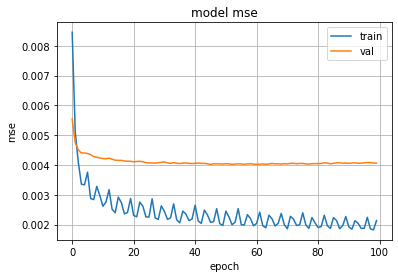

In [119]:
plot_error('mse', 'val_mse')

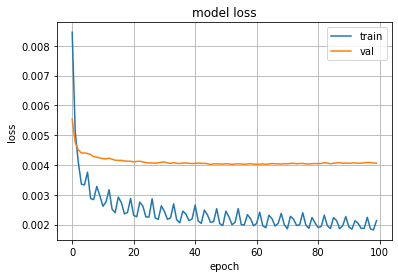

In [120]:
plot_error('loss', 'val_loss')

In [121]:
# прогнозування
y_pred = model.predict(X_test)

In [122]:
# позмірність вихідних даних
y_pred.shape

(19, 30)

In [123]:
last_train_val = pca_test_df['GS'].loc['2019-08-31']

# функція зворотної стандартизації
def invTransform(scaler, data):
    data = data.to_numpy()
    dummy = pd.DataFrame(np.zeros((len(data), scaler.n_features_in_)))
    dummy[dummy.columns[-1]] = data
    
    return scaler.inverse_transform(dummy)[:, -1]

def stack_output_test(y_pred, y_test):
    arr_pred = y_pred.flatten()
    arr_test = y_test.flatten()
    
    if len(arr_pred) == len(arr_test):
        print('Ok')
    else:
        print('Doesnt match')
        
    pred_df = pd.DataFrame(data = {'Predicted':arr_pred , 'Real': arr_test}, \
                           index = pd.to_datetime(np.arange(second_timestamp, len(arr_test), dtype = 'datetime64[D]')))
    
    # зворотня стаціонаризація
    pred_df['Predicted_non_stationary'] = np.r_[last_train_val, pred_df['Predicted']].cumsum()[1:] 
    pred_df['Real_non_stationary'] = np.r_[last_train_val, pred_df['Real']].cumsum()[1:]
    
    # зворотня стандартизація
    pred_df['Predicted_inverse'] = invTransform(standard_scaler, pred_df['Predicted_non_stationary'])
    pred_df['Real_inverse'] = invTransform(standard_scaler, pred_df['Real_non_stationary'])
    

    return pred_df

In [124]:
# результуючий датасет
pred_df = stack_output_test(y_pred, y_test)
pred_df

Ok


,Predicted,Real,Predicted_non_stationary,Real_non_stationary,Predicted_inverse,Real_inverse
2019-09-01,0.000442,-0.029319,0.667563,0.637801,202.693632,201.440002
2019-09-02,-0.001666,-0.029319,0.665897,0.608482,202.623466,200.205002
2019-09-03,0.009362,-0.029319,0.675259,0.579163,203.017810,198.970001
2019-09-04,-0.023435,-0.029319,0.651824,0.549844,202.030683,197.735000
2019-09-05,-0.001841,0.065523,0.649984,0.615367,201.953143,200.494995
...,...,...,...,...,...,...
2021-03-19,-0.006338,0.072408,1.174061,4.087862,224.028569,346.764999
2021-03-20,-0.003519,-0.090213,1.170542,3.997649,223.880353,342.965011
2021-03-21,0.006416,-0.038539,1.176958,3.959110,224.150599,341.341670
2021-03-22,-0.010638,-0.038539,1.166320,3.920571,223.702500,339.718328


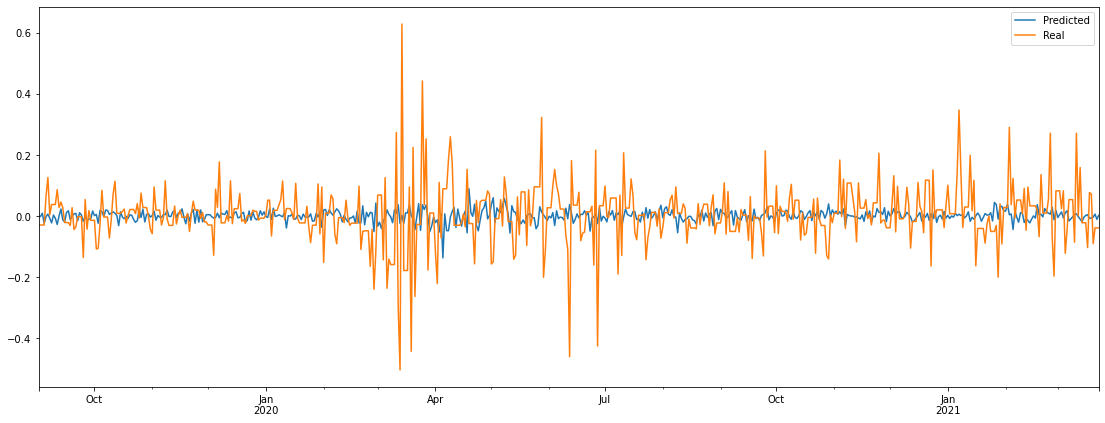

In [125]:
pred_df[['Predicted', 'Real']].plot(figsize=(19,7));

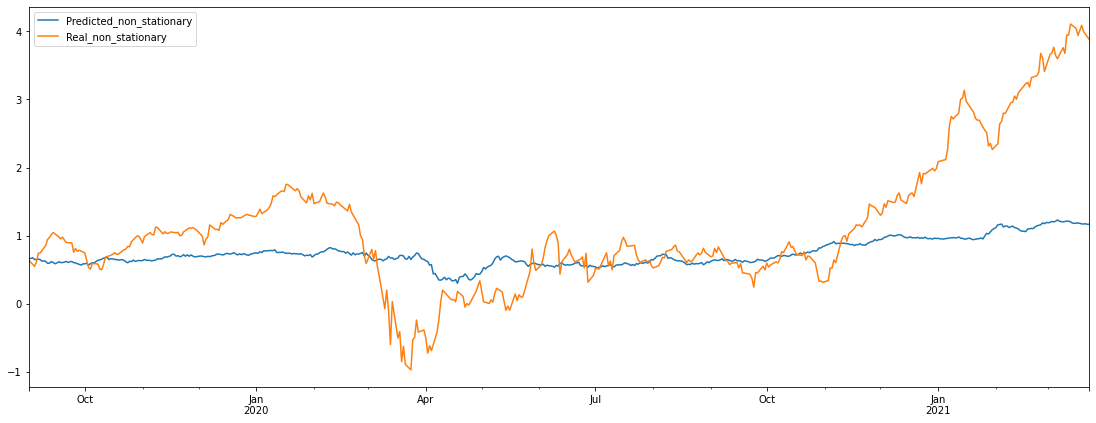

In [126]:
pred_df[['Predicted_non_stationary', 'Real_non_stationary']].plot(figsize=(19,7));

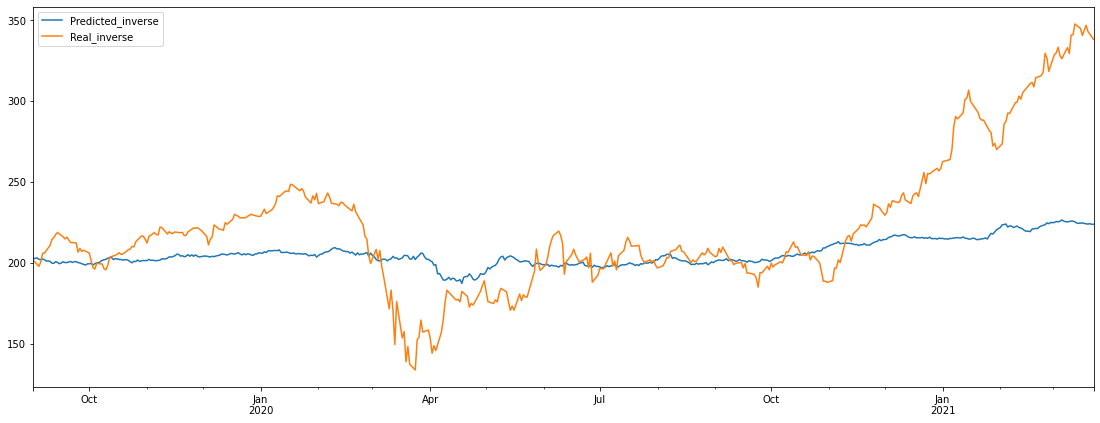

In [127]:
pred_df[['Predicted_inverse', 'Real_inverse']].plot(figsize=(19,7));

In [121]:
y_test

array([[-2.93192986e-02, -2.93192986e-02, -2.93192986e-02,
         6.55231322e-02,  1.26298606e-01,  3.79854429e-03,
         3.77470032e-02,  3.77470032e-02,  3.77470032e-02,
         8.66523390e-02,  2.77761132e-02,  4.60562456e-02,
         2.75384965e-02, -2.12079534e-02, -2.12079534e-02,
        -2.12079534e-02, -3.10997327e-02,  2.77761132e-02,
        -4.39197128e-02, -3.53728457e-02, -2.21574628e-03,
        -2.21574628e-03, -2.21574628e-03, -1.35557327e-01,
         5.41278792e-02, -4.29699106e-02,  1.78052312e-02,
        -1.37694184e-02, -1.37694184e-02, -1.37694184e-02],
       [-1.07780857e-01, -1.05407016e-01, -2.39775927e-02,
         8.45154501e-02, -3.16544566e-03, -3.16544566e-03,
        -3.16544566e-03, -7.19331104e-02, -1.23446992e-02,
         7.16954699e-02,  1.14190835e-01,  9.02142795e-03,
         9.02142795e-03,  9.02142795e-03,  1.51937973e-02,
         2.27904823e-02, -2.27904823e-02,  1.42434728e-03,
         2.16036489e-02,  2.16036489e-02,  2.16036489e-

In [125]:
len(y_test.flatten())

570